Given an m x n board of characters and a list of strings words, return all words on the board.

Each word must be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once in a word.

 

Example 1:

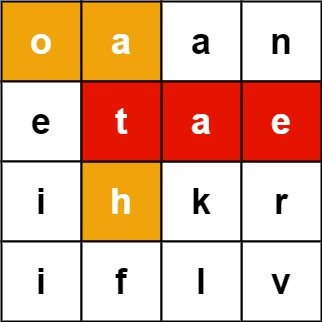

Input: board = [["o","a","a","n"],["e","t","a","e"],["i","h","k","r"],["i","f","l","v"]], words = ["oath","pea","eat","rain"]
Output: ["eat","oath"]

Example 2:

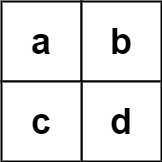

Input: board = [["a","b"],["c","d"]], words = ["abcb"]
Output: []

 

Constraints:

    m == board.length
    n == board[i].length
    1 <= m, n <= 12
    board[i][j] is a lowercase English letter.
    1 <= words.length <= 3 * 104
    1 <= words[i].length <= 10
    words[i] consists of lowercase English letters.
    All the strings of words are unique.



In [ ]:
class Trie:
    def __init__(self, words=[]):
        self.trie = {}
        for w in words: self.insert(w)

    def insert(self, word):
        t = self.trie
        for w in word:
            if w not in t:
                t[w] = {}
            t = t[w]
        t['#'] = '#'

    def search(self, word):
        t = self.trie
        for w in word:
            if w not in t:
                return False
            t = t[w]
        if '#' in t:
            return True
        return False

    def starts(self, prefix):
        t = self.trie
        for w in prefix:
            if w not in t:
                return False
            t = t[w]
        return True
    
    def remove(self, word):
        t = self.trie
        nodes = []
        for w in word:
            if w not in t:
                return False
            t = t[w]
            nodes.append((t,w))

        if '#' in t:
            p = '#'
            for n,w in nodes[::-1]:
                if len(n[p]) == 0 or p == '#' : del n[p]
                p = w

class Solution:
    def findWords(self, board: List[List[str]], words: List[str]) -> List[str]:
        m, n = len(board), len(board[0])
        trie = Trie(words)                   # trie is initialized with a list of words
        seen = set()                         # found words are being collected into a set
                
        # generator that yields (!) adjacent cells
        def adj(x, y):
            for i,j in [(0,-1),(0,1),(-1,0),(1,0)]:
                if 0 <= x+i < m and 0 <= y+j < n:
                    yield (x+i,y+j)
        
        # DFS search with prefix 'p', last cell (x,y) on board 'b'
        def dfs(p, b, x, y):          
            
            ch, b[x][y] = b[x][y], "#"        # [1] mark used cell and save board state
            
            if trie.search(p):               
                seen.add(p)                   # [2] mark word as found and
                trie.remove(p)                #     no longer search for it

            for i,j in adj(x, y):             # [3] iterate over adjacent cells
                if b[i][j] != "#":            #     which are still unused
                    pp = p + b[i][j]          #     and extend the word
                    if trie.starts(pp):       # [4] if the prefix exists in the trie,
                        dfs(pp, b, i, j)      #     we should check this branch
            
            b[x][y] = ch                      # [5] restore board state
        
        for i in range(m):                    # DFS procedure is initialized starting
            for j in range(n):                # from all possible cells (i,j)
                dfs(board[i][j], board, i, j)
        
        return seen